<a href="https://colab.research.google.com/github/kavivino2620-alt/k-means-/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

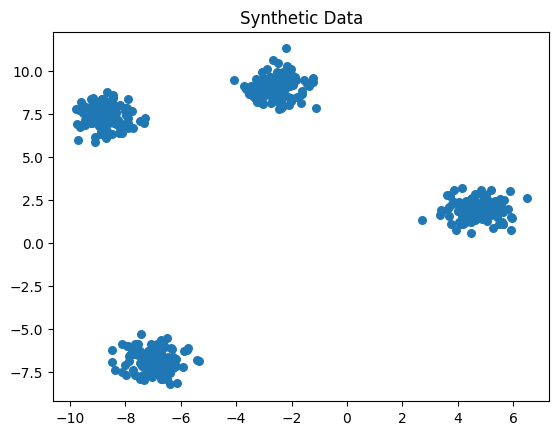

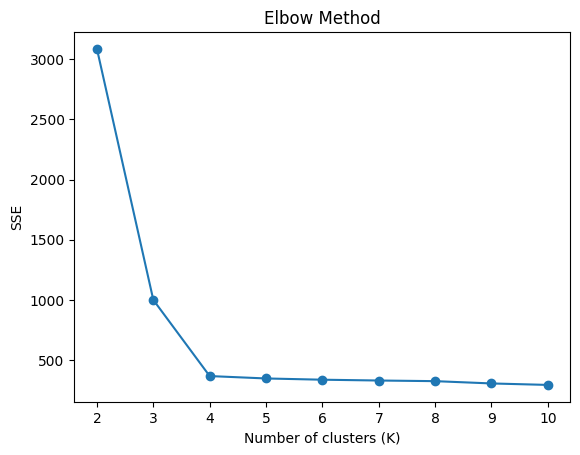

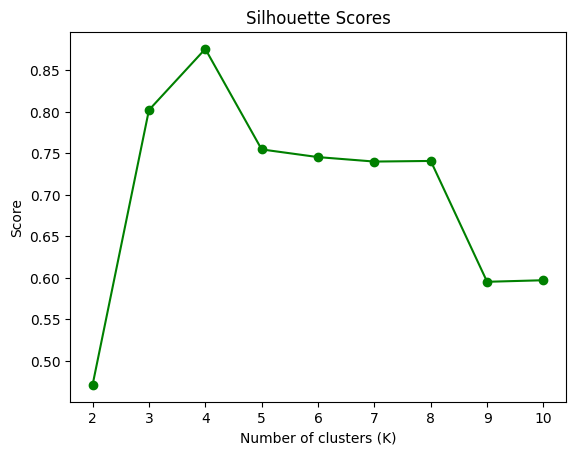

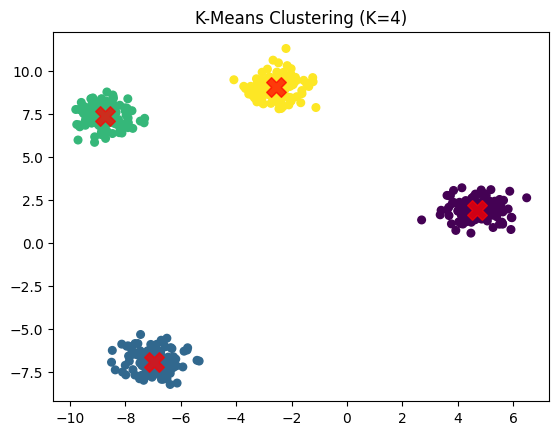

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic 2D data with 4 clusters
X, ytrue = make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=42)
plt.scatter(X[:, 0], X[:, 1], s=30)
plt.title("Synthetic Data")
plt.show()

def initialize_centroids(X, k):
    np.random.seed(42)
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]

def assign_clusters(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, k):
    return np.array([X[labels == i].mean(axis=0) for i in range(k)])

def compute_sse(X, labels, centroids):
    return sum(np.linalg.norm(X[labels == i] - centroids[i], axis=1).sum() for i in range(len(centroids)))

def kmeans(X, k, max_iters=100):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return labels, centroids

from sklearn.metrics import silhouette_score

sse = []
silhouette_scores = []

for k in range(2, 11):
    labels, centroids = kmeans(X, k)
    sse.append(compute_sse(X, labels, centroids))
    silhouette_scores.append(silhouette_score(X, labels))

# Plot Elbow Method
plt.plot(range(2, 11), sse, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters (K)")
plt.ylabel("SSE")
plt.show()

# Plot Silhouette Scores
plt.plot(range(2, 11), silhouette_scores, marker='o', color='green')
plt.title("Silhouette Scores")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Score")
plt.show()

optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2
labels, centroids = kmeans(X, optimal_k)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title(f"K-Means Clustering (K={optimal_k})")
plt.show()